In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

#Load data

In [ ]:
# Read the CSV file
# path = "/content/MSFT.csv"
path = "/content/AAPL.csv"
df = pd.read_csv(path, parse_dates = ['Date'])
# Set the date range from 01-01-1990 to 01-01-2022
start_date = '1990-01-01'
end_date = '2022-01-01'
# Filter data within the date range
stockdt = df.loc[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
#Set index column
stockdt.set_index('Date', inplace=True)

In [ ]:
stockdt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263414,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265181,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266066,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266950,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268718,101572800


In [ ]:
stockdt.shape

(8064, 6)

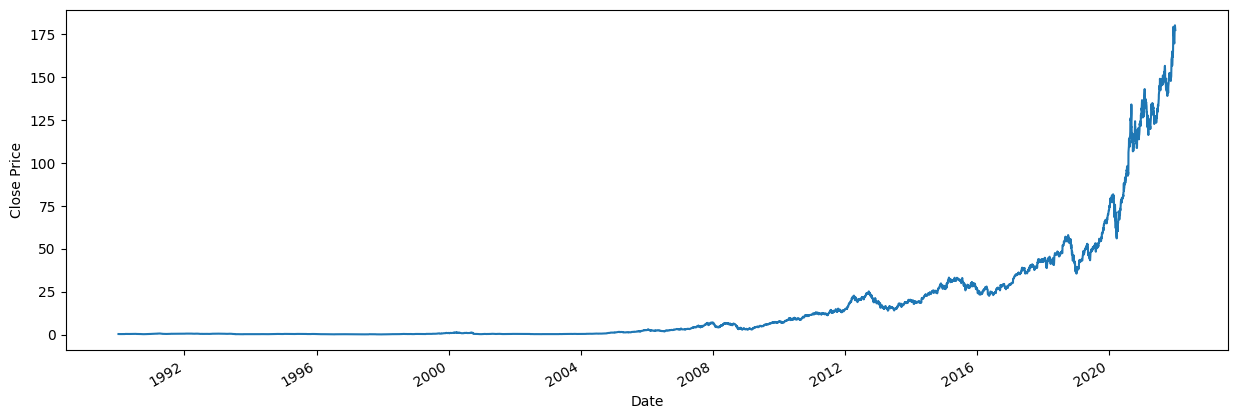

In [ ]:
plt.figure(figsize=(15,5))
stockdt['Close'].plot()
plt.ylabel('Close Price')
plt.show()

# Smooth data

In [ ]:
alpha = 0.045

In [ ]:
stockdt['Smooth'] = pd.Series(np.array([0 for i in range(stockdt.shape[0])]))
stockdt['Smooth'][0] = stockdt['Close'][0]

<ipython-input-158-ccca33800462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'] = pd.Series(np.array([0 for i in range(stockdt.shape[0])]))
<ipython-input-158-ccca33800462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][0] = stockdt['Close'][0]


In [ ]:
stockdt['Smooth']

Date
1990-01-02    0.332589
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN
                ...   
2021-12-27         NaN
2021-12-28         NaN
2021-12-29         NaN
2021-12-30         NaN
2021-12-31         NaN
Name: Smooth, Length: 8064, dtype: float64

In [ ]:
for i in range(1, stockdt.shape[0]):
    stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-160-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-160-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-160-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
stockdt['Smooth'][:6]

Date
1990-01-02    0.332589
1990-01-03    0.332589
1990-01-04    0.332689
1990-01-05    0.332836
1990-01-08    0.333025
1990-01-09    0.333307
Name: Smooth, dtype: float64

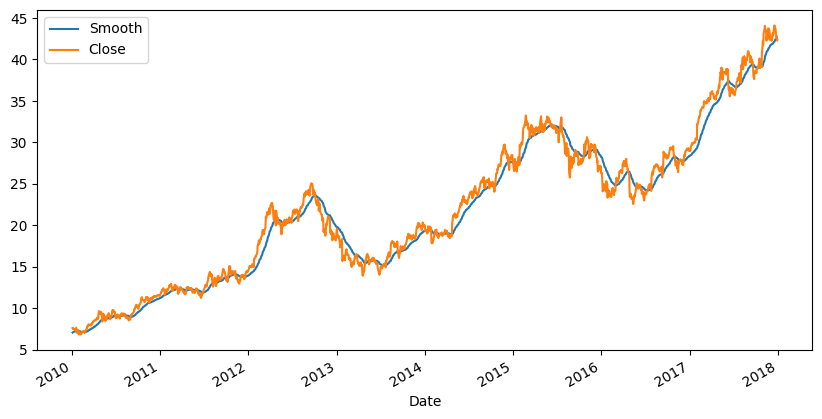

In [ ]:
plt.figure(figsize=(10,5))
stockdt.loc["2010-01-01":"2018-01-01", ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2010-01-01":"2018-01-01", ['Close']].plot(ax=plt.gca())
plt.show()

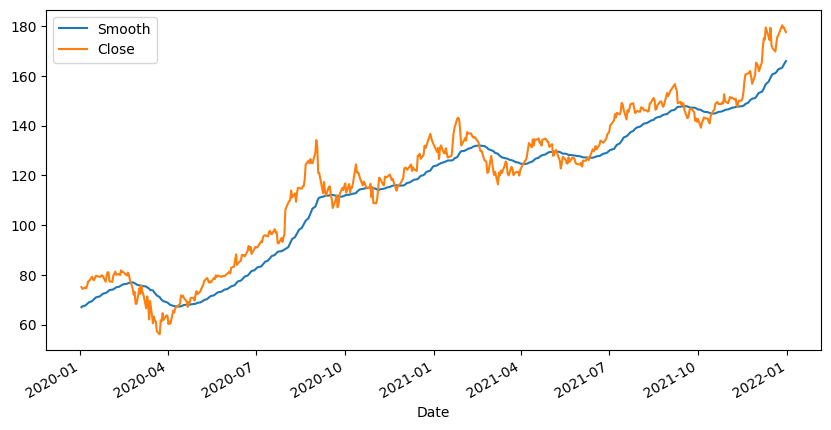

In [ ]:
plt.figure(figsize=(10,5))
stockdt.loc["2020-01-01":, ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2020-01-01":, ['Close']].plot(ax=plt.gca())
plt.show()

In [ ]:
stockdt

,Open,High,Low,Close,Adj Close,Volume,Smooth
Date,,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263414,183198400,0.332589
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265181,207995200,0.332589
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266066,221513600,0.332689
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266950,123312000,0.332836
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268718,101572800,0.333025
...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.292877,74919600,163.233420
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.264603,79144300,164.002767
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.353592,62348900,164.690692


# Technical Indicators


RELATIVE STRENGTH INDEX (RSI)

It evaluates the conditions of overbought and oversold in the stock prices by measuring the extent of recent changes in prices. The RSI compares stock’s average gains and losses over a specific period of time, typically 14 trading days. RSI ranges between 0 and 100, and traditionally, RSI above 70 indicates that the stock is overbought, while RSI below 30 indicates that the stock is oversold.
In this paper, we use a 27-day time-frame to calculate the initial value of the RSI. The formula for calculating RSI is:


$RSI = 100 - \dfrac{100}{1+RS}$


$RS = \dfrac{Average gain over 27 days}{Average loss over 27 days}$

RSI stands for relative strength index, and RS stands for relative strength.


In [ ]:
def RSI(series):
    delta = series.diff()
    up = delta.clip(lower = 0)
    down = -1.0*delta.clip(upper = 0)

    ema_up = up.ewm(com = 26, adjust = False).mean()
    ema_down = down.ewm(com = 26, adjust = False).mean()

    rs = ema_up / ema_down
    rsi = 100 - (100 / (1+rs))
    return rsi

In [ ]:
stockdt['RSI'] = RSI(stockdt['Smooth'])

<ipython-input-166-ef17832d290c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['RSI'] = RSI(stockdt['Smooth'])


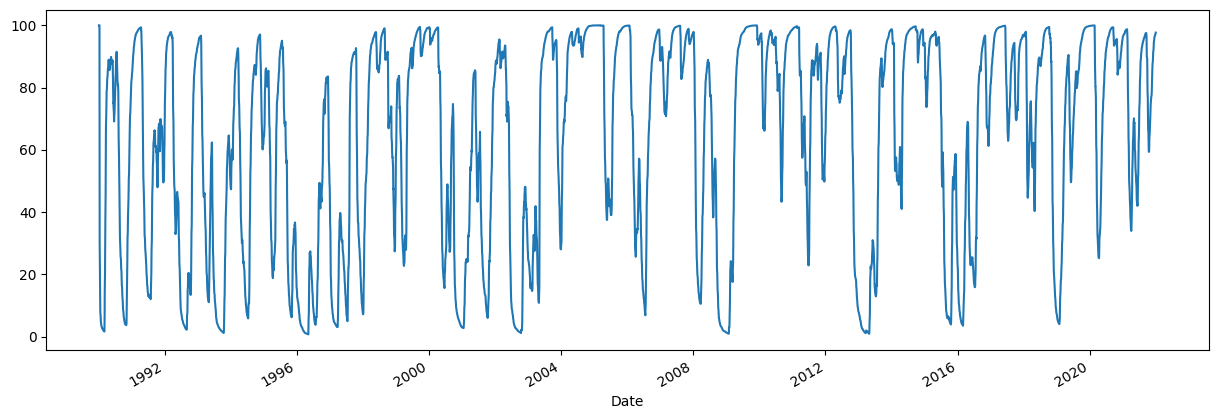

In [ ]:
plt.figure(figsize=(15,5))
stockdt['RSI'].plot()
plt.show()

MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD)

The moving average convergence divergence (MACD) is defined to be a trend-following momentum indicator that helps investors understand whether the bearish or bullish movement in prices is becoming stronger or weaker.

It is computed by subtracting the 26-day exponential moving average which is the longer moving average from the 12-day exponential moving average of a security’s prices which is defined to be the shorter one. The line obtained from this calculation called the MACD line and the 9-day exponential moving average of the MACD line called the signal line which can work as an incitement for buy and sell signals. However, MACD indicates a buy signal whenever it is above the signal line and a sell signal whenever it is below the signal line.

The formula for calculating MACD is as follows:


$MACD = EMA_{12}(C) - EMA_{26}(C)$

$SL = EMA_9(MACD)$

MACD stands for moving average convergence divergence or MACD line and SL stands for the signal line.

$EMA_n$= n-day exponential moving average

C = closing price

In [ ]:
def MACD(series):
    ema_12 = series.ewm(span = 12).mean()
    ema_26 = series.ewm(span = 26).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span = 9).mean()
    return macd, signal

In [ ]:
stockdt['MACD'] = MACD(stockdt['Smooth'])[0] - MACD(stockdt['Smooth'])[1]

<ipython-input-169-149c51fc1599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['MACD'] = MACD(stockdt['Smooth'])[0] - MACD(stockdt['Smooth'])[1]


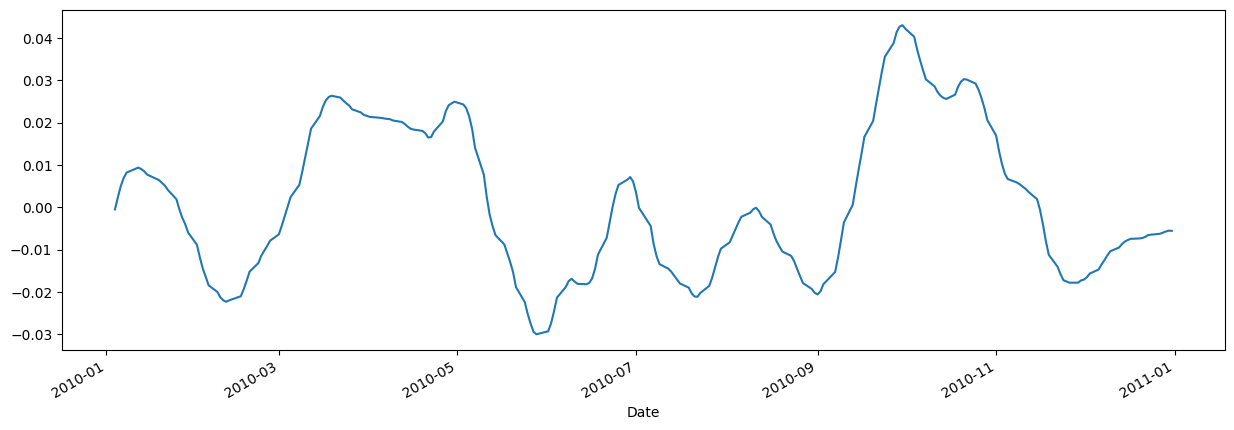

In [ ]:
plt.figure(figsize=(15,5))
stockdt.loc['2010-01-01':'2011-01-01', 'MACD'].plot(ax=plt.gca())
plt.show()

PRICE RATE OF CHANGE (ROC)

The price rate of change (ROC) is another momentum oscillator that compares and cal- culates the percent change in price between the current price and the price n-periods ago. In other words, ROC measures the changes between the current price with respect to the earlier closing price in n days ago. It moves from positive to negative, and fluctu- ates above and below the zero-line. However, this oscillator can be used for determining the overbought and oversold conditions, divergences and also zero-line crossovers.
We use a 21-day time-frame to calculate the initial value of the ROC. The formula for calculating ROC is as follows:

$ROC = \dfrac{C_t - C_{t-21}}{C_{t-21}} .100$

where,

ROC stands for price rate of change at time t;

Ct = closing price at time t;

Ct−21 = closing price 21 periods ago

In [ ]:
def ROC(series):
    return (series - series.shift(21))*100/series.shift(21)

In [ ]:
stockdt['ROC'] = ROC(stockdt['Smooth'])

<ipython-input-172-f724f01ab266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['ROC'] = ROC(stockdt['Smooth'])


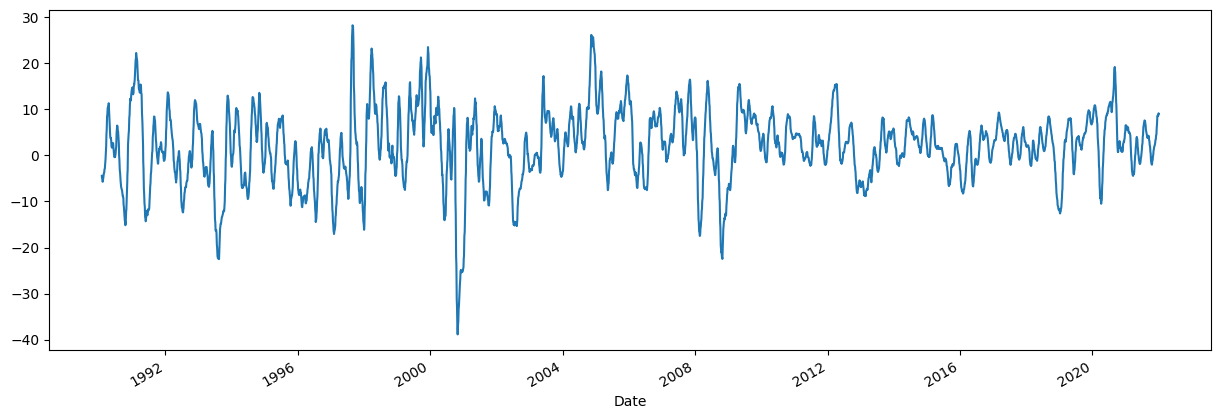

In [ ]:
plt.figure(figsize=(15,5))
stockdt['ROC'].plot()
plt.show()

STOCHASTIC OSCILLATOR (%K)

The stochastic oscillator which is often denoted by the symbol (%K), is a momentum oscillator that was developed by George Lane. The stochastic oscillator identifies the location of the stock’s closing price relative to the high and low range of the stock’s price over a period of time, typically being 14 trading days. The stochastic oscillator varies from 0 to 100, a reading above 80 generally represents overbought while below 20 represents oversold. We use a 14-day time-frame %K. The formula for calculating the stochastic oscillator is given below:

$\% K = \dfrac{C_t - L_{14}}{H_{14} - L_{14}} \times 100$

where,

Ct = the current closing price.

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days

In [ ]:
def STO_OS(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (smooth - low_14)*100/(high_14 - low_14)

In [ ]:
stockdt['%K'] = STO_OS(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

<ipython-input-175-3b7ee821630a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['%K'] = STO_OS(stockdt['Low'], stockdt['High'], stockdt['Smooth'])


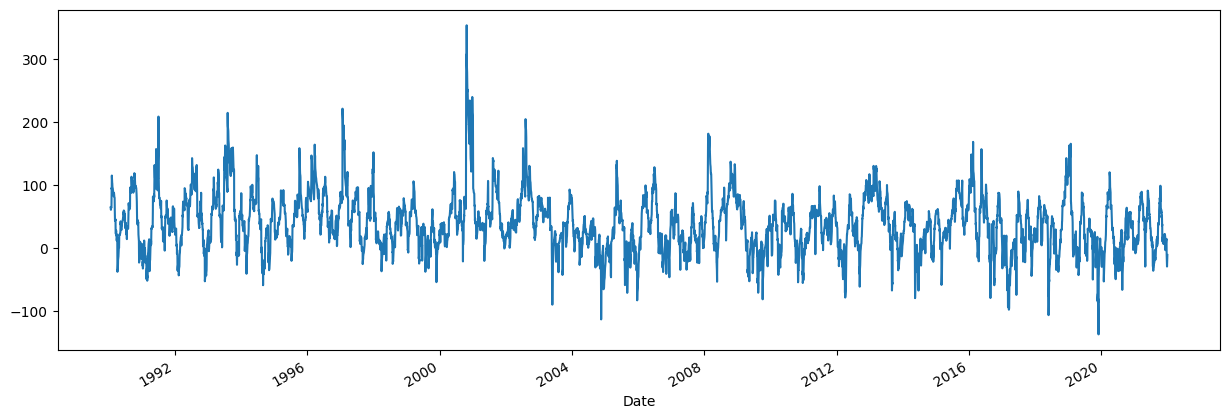

In [ ]:
plt.figure(figsize=(15,5))
stockdt['%K'].plot()
plt.show()

WILLIAMS PERCENTAGE RANGE (WILLIAM %R)

Williams percentage range which is also called Williams %R is a common indicator developed by Larry Williams. This indicator is often denoted by the symbol (%R), it measures the overbought and oversold levels and it works inversely to %K. Whilst %K ranges between 0 and 100, %R ranges between 0 and -100. A Williams %R below -80 indicates a buy signal, whereas a Williams %R above -20 indicates a sell signal.
We use also a 14-day time frame %R, the formula used to calculate the Williams %R is:

$\% R = \dfrac{H_{14} - C_t}{H_{14} - L_{14}} \times -100$

where,

Ct = the current closing price

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days


In [ ]:
def WILLIAM(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (high_14 - smooth)*-100/(high_14 - low_14)

In [ ]:
stockdt['%R'] = WILLIAM(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

<ipython-input-178-868d1f309242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['%R'] = WILLIAM(stockdt['Low'], stockdt['High'], stockdt['Smooth'])


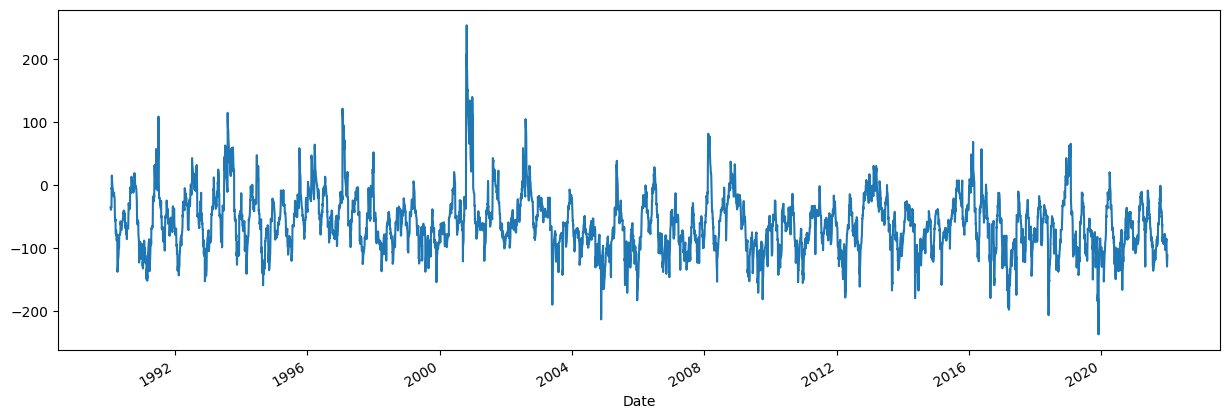

In [ ]:
plt.figure(figsize=(15,5))
stockdt['%R'].plot()
plt.show()

COMMODITY CHANNEL INDEX (CCI)

The Commodity Channel Index (CCI) was developed by Donald Lambert, it is a useful oscillator that is used to estimate the direction and the strength of the stock price trend. This indicator is also used to determine when stock prices reach the condition of either overbought and oversold. The CCI is calculated by first determining the difference between the mean price of a stock and the average of the means, then comparing this difference to the average difference over a period of time, typically 20 days. The CCI is often scaled by an inverse factor of 0.015. The formula used to calculate the CCI is:

$CCI = \dfrac{TypicalPrice - MA_{20}}{0.015 \times D}$

where,
Typical price = average of low, high and close prices: $\sum_{i = 1}^{20}(H+L+C)/3$
    
MA20 = simple moving average over 20 days

D = mean deviation

In [ ]:
def CCI(high, low, smooth):
    typical_price = (high + low + smooth) / 3
    rolling_mean = typical_price.rolling(window=20).mean()
    rolling_std = typical_price.rolling(window=20).std()
    return (typical_price - rolling_mean) / (0.015 * rolling_std)


In [ ]:
stockdt['CCI'] = CCI(stockdt['High'], stockdt['Low'], stockdt['Smooth'])

<ipython-input-181-0a7047fd48cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['CCI'] = CCI(stockdt['High'], stockdt['Low'], stockdt['Smooth'])


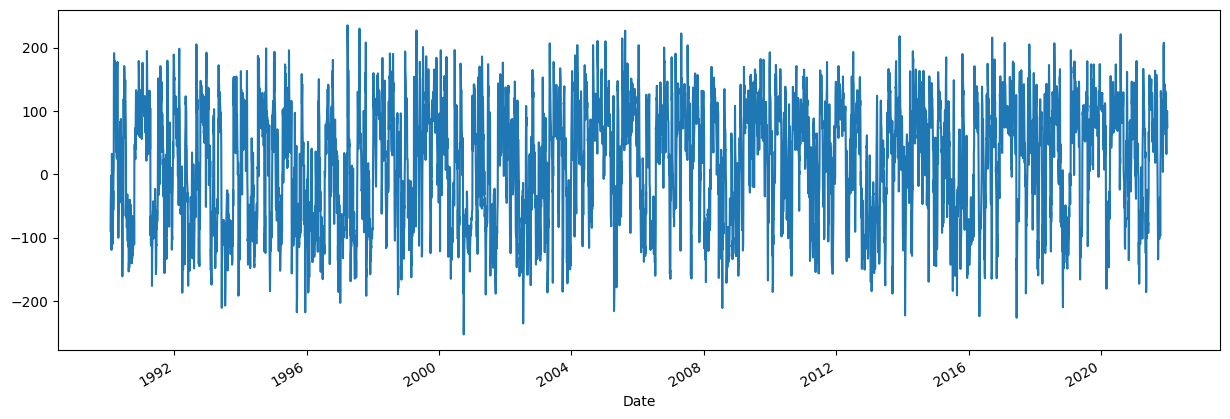

In [ ]:
plt.figure(figsize=(15,5))
stockdt['CCI'].plot()
plt.show()

DISPARITY INDEX (DIX)

The Disparity Index (DIX) is another useful indicator that is used commonly in technical analysis. This indicator was developed by Steve Nison and it is a momentum indicator that compares the stock’s current price with its moving average (MA) over a particular time period. DIX below 0 indicates that the stock’s current price is below the n-day MA, DIX above 0 indicates that the stock’s current price is above the n-day MA, whereas in the case the DIX equals 0 indicates that the stock’s current price is equal to the n-day MA. 14-day MA is used in this paper. The formula for calculating the DIX with 14-day MA is as follows:


$DIX = \dfrac{C_t - MA_{14}}{MA_{14} \times 100}$

where,

Ct = current stock price.

MA14 = moving average over 14 days

In [ ]:
def DIX(smooth):
    ma_14 = smooth.rolling(window=14).mean()
    return (smooth - ma_14)/(ma_14)

In [ ]:
stockdt['DIX'] = DIX(stockdt['Smooth'])

<ipython-input-184-514eecc0505e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['DIX'] = DIX(stockdt['Smooth'])


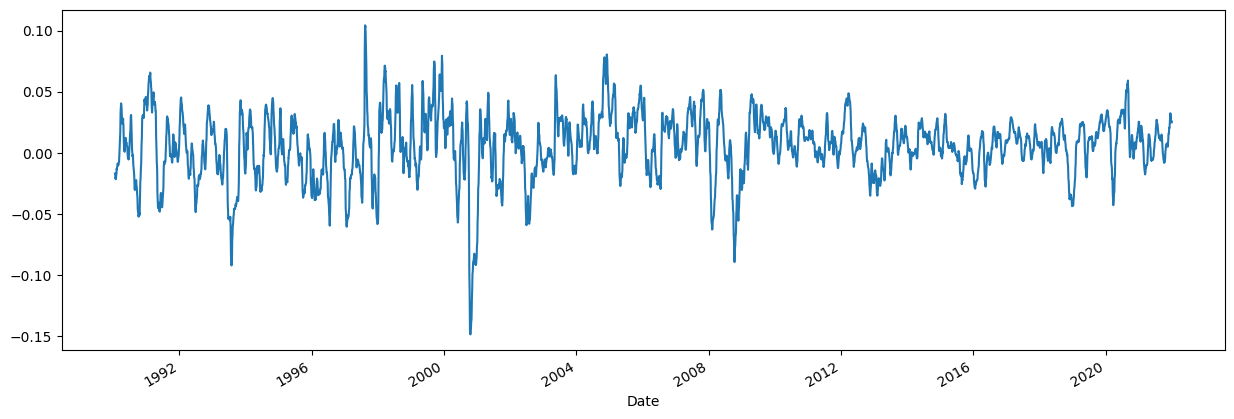

In [ ]:
plt.figure(figsize=(15,5))
stockdt['DIX'].plot()
plt.show()

# DATA LABELLING

In [ ]:
stockdt['Target_30_smooth'] = np.sign(stockdt['Smooth'].shift(-30) - stockdt['Smooth'])

<ipython-input-186-a2a22743b25b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Target_30_smooth'] = np.sign(stockdt['Smooth'].shift(-30) - stockdt['Smooth'])


In [ ]:
stockdt.dropna(axis=0, inplace = True)

<ipython-input-187-cdbe73693463>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt.dropna(axis=0, inplace = True)


In [ ]:
stockdt[100:150]

,Open,High,Low,Close,Adj Close,Volume,Smooth,RSI,MACD,ROC,%K,%R,CCI,DIX,Target_30_smooth
Date,,,,,,,,,,,,,,,
1990-06-25,0.370536,0.372768,0.359375,0.368304,0.293452,122001600,0.359181,71.776191,-0.000589,-0.271756,53.235522,-46.764478,57.100077,-0.000055,1.0
1990-06-26,0.372768,0.375000,0.360491,0.362723,0.289005,127254400,0.359592,72.600730,-0.000469,-0.342555,54.132686,-45.867314,65.676633,0.001446,1.0
1990-06-27,0.363839,0.375000,0.359375,0.370536,0.295230,97227200,0.359732,72.883109,-0.000371,-0.257668,54.440634,-45.559366,65.300689,0.002091,1.0
1990-06-28,0.381696,0.386161,0.372768,0.383929,0.305901,249939200,0.360219,73.848714,-0.000269,-0.190235,47.171784,-52.828216,135.510523,0.003486,1.0
1990-06-29,0.383929,0.400670,0.381696,0.399554,0.318351,325192000,0.361286,75.811748,-0.000132,-0.000766,32.138007,-67.861993,170.796794,0.006115,1.0
1990-07-02,0.397321,0.397321,0.390625,0.392857,0.313015,135408000,0.363008,78.514868,0.000062,0.388161,35.105264,-64.894736,152.591235,0.010118,1.0
1990-07-03,0.391741,0.397321,0.390625,0.392857,0.313015,99500800,0.364351,80.298272,0.000257,0.731607,37.419722,-62.580278,130.677544,0.012814,1.0
1990-07-05,0.390625,0.395089,0.386161,0.388393,0.309458,107464000,0.365634,81.796762,0.000438,1.059419,39.630030,-60.369970,105.228701,0.015039,1.0
1990-07-06,0.388393,0.401786,0.386161,0.399554,0.318351,209059200,0.366658,82.876584,0.000584,1.457602,40.613763,-59.386237,104.939308,0.016299,1.0


# CORRELATION AMONG FEATURES AND TARGET

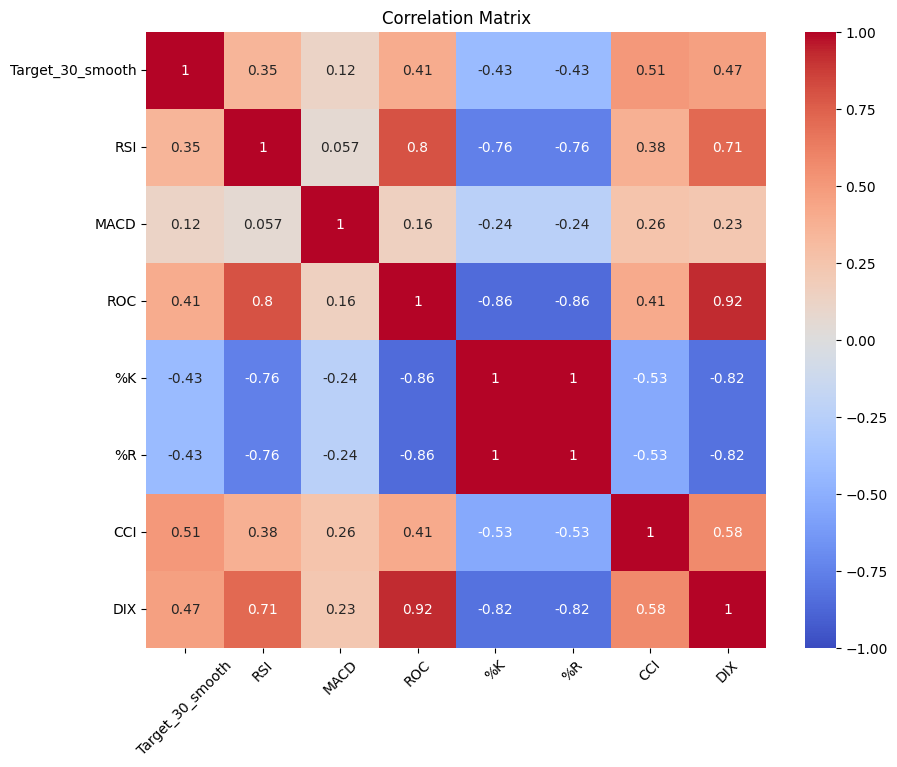

In [ ]:
# Calculate the correlation matrix
correlation_matrix = stockdt[['Target_30_smooth', 'RSI', 'MACD', 'ROC', '%K', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
stockdt = stockdt.drop('ROC', axis = 1)

In [ ]:
stockdt = stockdt.drop('%K', axis = 1)

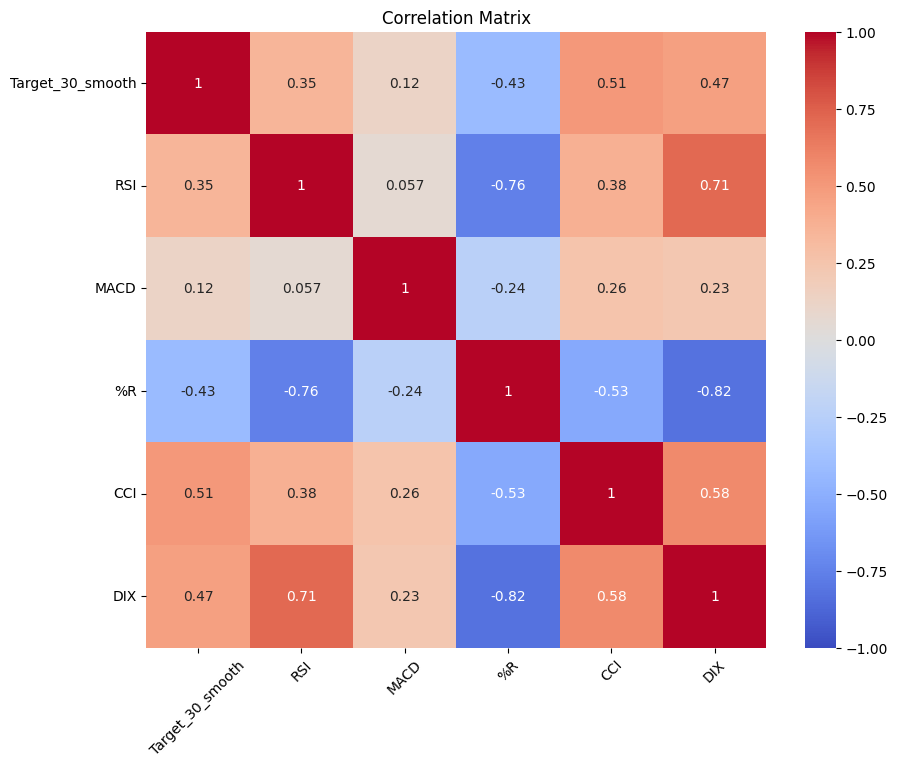

In [ ]:
# Calculate the correlation matrix
correlation_matrix_ = stockdt[['Target_30_smooth', 'RSI', 'MACD', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
stockdt.loc[:, 'RSI':]

,RSI,MACD,%R,CCI,DIX,Target_30_smooth
Date,,,,,,
1990-01-31,3.558756,-0.000718,-4.074160,-47.440714,-0.020375,-1.0
1990-02-01,3.377877,-0.000693,-6.063242,-37.426751,-0.019221,-1.0
1990-02-02,3.178407,-0.000664,15.458105,-36.518568,-0.018503,-1.0
1990-02-05,3.060739,-0.000618,4.502227,-4.714553,-0.017032,1.0
1990-02-06,3.022728,-0.000544,3.939652,-2.057753,-0.014689,1.0
...,...,...,...,...,...,...
2021-11-11,77.004261,0.172435,-81.750096,3.683269,0.006433,1.0
2021-11-12,77.056006,0.153531,-81.599454,7.588281,0.005508,1.0
2021-11-15,77.596442,0.136953,-80.044339,75.914068,0.005246,1.0


# TRAIN TEST SPLIT CASE PREDICTING



In [ ]:
X = stockdt.loc[:, 'RSI':'DIX']
y = stockdt.loc[:, 'Target_30_smooth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [ ]:
value_counts = pd.Series(y_train).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6675507020280811
Proportion of -1s: 0.33244929797191886


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [ ]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6643792888334373
Proportion of -1s: 0.33562071116656267


In [ ]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(X_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Hyperparameter:  {'max_depth': None, 'max_features': 2, 'n_estimators': 150}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("TARGET 30 DAYS")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS
Accuracy: 0.877105427323768
Precision: 0.8691289151274171
Recall: 0.8509459483044488
F1 Score: 0.8588853591845326
Confusion Matrix:
[[415 123]
 [ 74 991]]


# 2 UNSHUFFLED TRAINING SET AND TEST SET CASE

In [ ]:
x_train = stockdt.loc['1999-01-01':'2015-12-31', 'RSI':'DIX']
y_train = stockdt.loc['1999-01-01':'2015-12-31', 'Target_30_smooth']

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [ ]:
value_counts = y_train.value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6778115501519757
Proportion of -1s: 0.3221884498480243


In [ ]:
x_train

,RSI,MACD,%R,CCI,DIX
Date,,,,,
1999-01-04,61.008334,0.001615,-60.690214,106.114811,0.029161
1999-01-05,63.940601,0.001844,-66.550009,118.496954,0.032687
1999-01-06,67.407031,0.002081,-64.393982,104.017949,0.037640
1999-01-07,69.617122,0.002258,-65.920468,107.455512,0.039586
1999-01-08,72.695524,0.002460,-70.212888,120.377423,0.044381
...,...,...,...,...,...
2015-12-24,29.547029,-0.077579,-39.789503,-83.747977,-0.014721
2015-12-28,27.793584,-0.081950,-36.089053,-95.654781,-0.015459
2015-12-29,25.951299,-0.085339,-33.918301,-73.719439,-0.016325


In [ ]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(x_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(x_train, y_train)

Hyperparameter:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 150}


RandomForestClassifier(max_depth=2, max_features=2, n_estimators=150,
                       random_state=42)

# MODEL TESTING FROM 2016-01-01


In [ ]:
y_pred = model.predict(stockdt.loc['2016-01-01':, 'RSI':'DIX'].values)
y_test = stockdt.loc['2016-01-01':, 'Target_30_smooth'].values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [ ]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.7582714382174207
Proportion of -1s: 0.24172856178257934


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("TARGET 30 DAYS FROM 2020-06-01")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS FROM 2020-06-01
Accuracy: 0.7521944632005402
Precision: 0.647576281791748
Recall: 0.6196764452757727
F1 Score: 0.6287497993572603
Confusion Matrix:
[[130 228]
 [139 984]]


# K-FOLDS CROSS-VALIDATION

In [ ]:
X = stockdt.loc[:, 'RSI':'DIX'].values
y = stockdt.loc[:, 'Target_30_smooth'].values

In [ ]:
folds = 5

In [ ]:
kfold = KFold(n_splits=folds, shuffle=False)
models = []
scores = []

In [ ]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)

    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    scores.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


Proportion of 1s of Target_30_smooth in training set: 0.6480499219968798
Proportion of -1s of Target_30_smooth in training set: 0.3519500780031201
Proportion of 1s of Target_30_smooth in testing set: 0.74235807860262
Proportion of -1s of Target_30_smooth in testing set: 0.2576419213973799
Hyperparameter:  {'max_depth': 2, 'max_features': 3, 'n_estimators': 100}
Training error: 0.23416536661466458
TARGET 30 DAYS
Accuracy: 0.7822832189644416
Precision: 0.7135068919723405
Recall: 0.6897308075772681
F1 Score: 0.6993263088875095
Confusion Matrix:
[[ 206  207]
 [ 142 1048]]
Proportion of 1s of Target_30_smooth in training set: 0.6833073322932918
Proportion of -1s of Target_30_smooth in training set: 0.3166926677067083
Proportion of 1s of Target_30_smooth in testing set: 0.6013724266999376
Proportion of -1s of Target_30_smooth in testing set: 0.3986275733000624
Hyperparameter:  {'max_depth': 2, 'max_features': 2, 'n_estimators': 75}
Training error: 0.21716068642745712
TARGET 30 DAYS
Accuracy:

# FEATURE IMPORTANCE IN K-FOLDS CROSS-VALIDATION

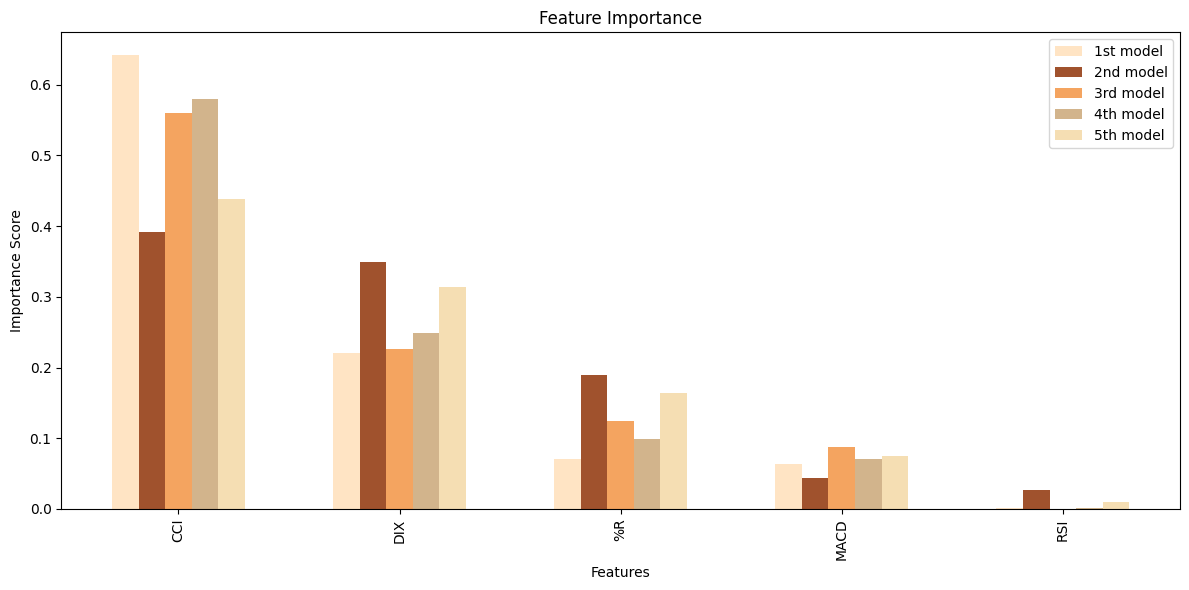

In [ ]:
model_names = ['1st model', '2nd model', '3rd model', '4th model', '5th model']

feature_importances = []
for model in models:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()


# ROLLING CROSS-VALIDATION

In [ ]:
folds = 5

In [ ]:
tscv = TimeSeriesSplit(n_splits=folds)
models_ts = []
score_ts = []
train_ts = []

In [ ]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train))

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)


    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    models_ts.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    train_ts.append(training_error)
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    score_ts.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


1338
Proportion of 1s of Target_30_smooth in training set: 0.7436472346786248
Proportion of -1s of Target_30_smooth in training set: 0.2563527653213752
Proportion of 1s of Target_30_smooth in testing set: 0.7205992509363296
Proportion of -1s of Target_30_smooth in testing set: 0.2794007490636704
Hyperparameter:  {'max_depth': 5, 'max_features': 2, 'n_estimators': 200}
Training error: 0.12032884902840058
Training error: 0.12032884902840058
TARGET 30 DAYS
Accuracy: 0.7093632958801498
Precision: 0.6036318546109137
Recall: 0.560324502683752
F1 Score: 0.5581370749251022
Confusion Matrix:
[[ 83 290]
 [ 98 864]]
2673
Proportion of 1s of Target_30_smooth in training set: 0.732136176580621
Proportion of -1s of Target_30_smooth in training set: 0.267863823419379
Proportion of 1s of Target_30_smooth in testing set: 0.48314606741573035
Proportion of -1s of Target_30_smooth in testing set: 0.5168539325842697
Hyperparameter:  {'max_depth': 2, 'max_features': 4, 'n_estimators': 150}
Training error: 0

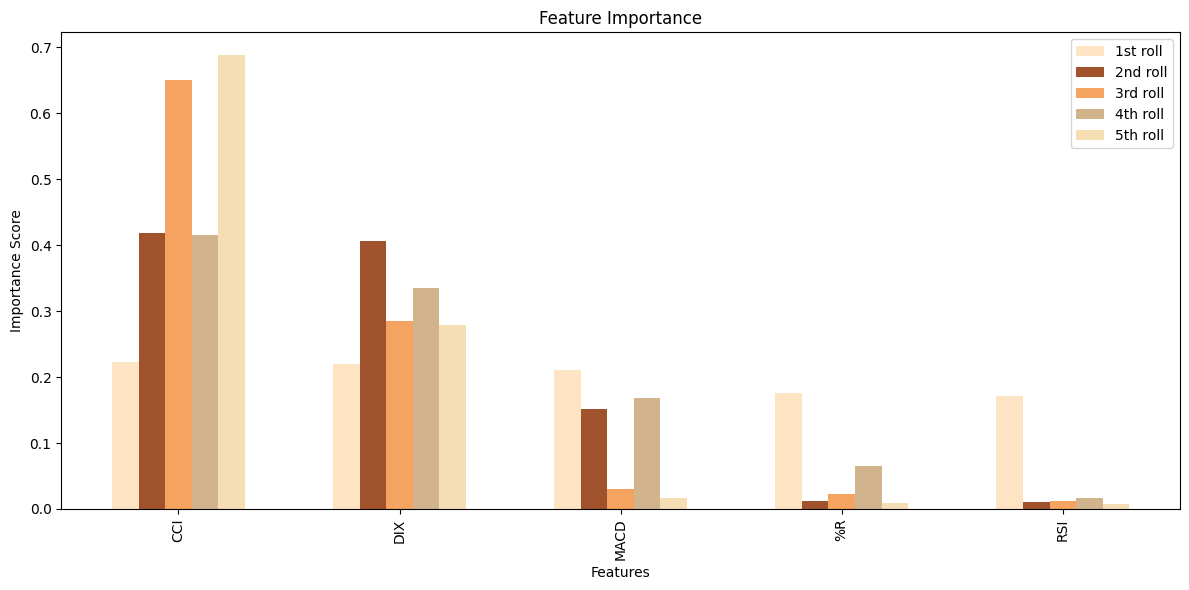

In [ ]:
model_names = ['1st roll', '2nd roll', '3rd roll', '4th roll', '5th roll']

feature_importances = []
for model in models_ts:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()
